In [1]:
import sys
sys.path.append('../../')
%load_ext autoreload
%autoreload 2
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Python standard-libraries to download data from the web
from urllib.parse import urlencode
from urllib.request import urlretrieve

#Some astropy submodules that you know already
from astropy import units as u
from astropy import coordinates as coords
from astropy.coordinates import SkyCoord
from astropy.io import fits

#only here to display images
from IPython.display import Image

In [4]:
from datasets import load_dataset_builder, load_dataset
from astropile.utils import get_catalog, cross_match_datasets
from datasets import load_dataset_builder, load_dataset

In [5]:
jwst = load_dataset('/Users/marchuertascompany/Documents/python_scripts/visualstudio/AstroPile_prototype/scripts/jwst', streaming=True, split='train', trust_remote_code=True)


In [6]:
# Also accessing the builders
jwst_dset = load_dataset_builder('/Users/marchuertascompany/Documents/python_scripts/visualstudio/AstroPile_prototype/scripts/jwst', trust_remote_code=True)

In [9]:
jwst_cat = get_catalog(jwst_dset)

In [10]:
iter_jwst = iter(jwst)

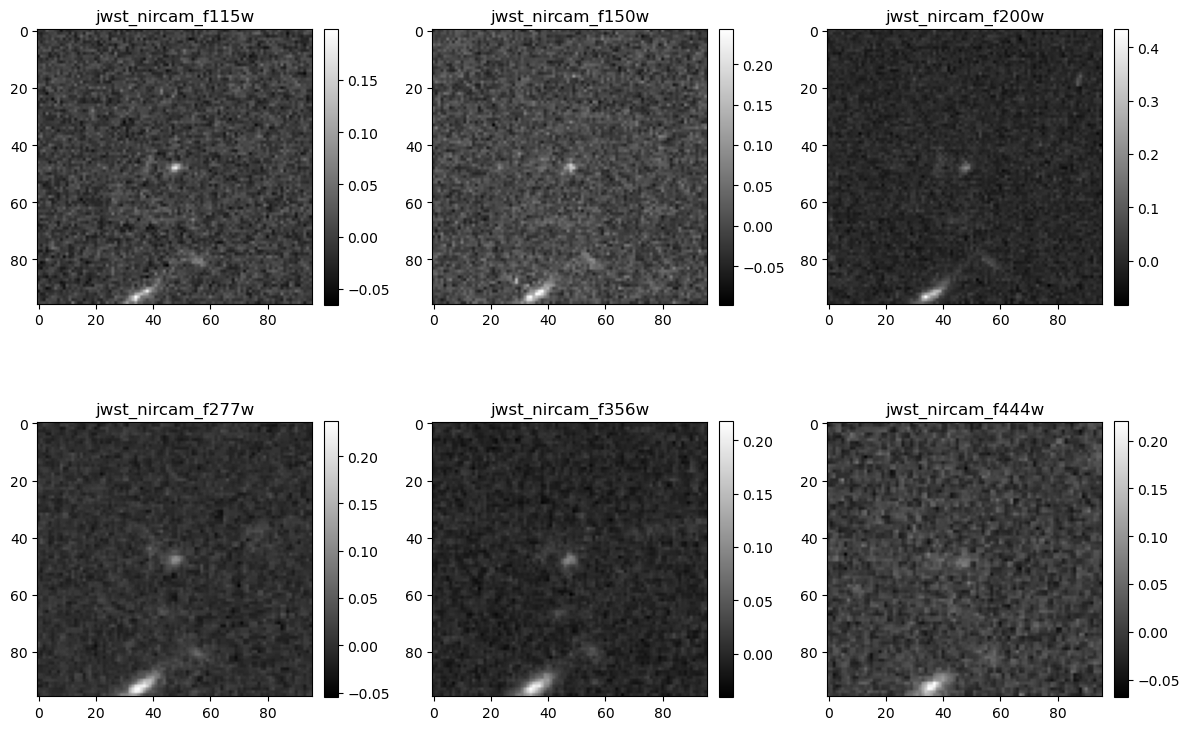

In [21]:
example = next(iter_jwst)
bands = example['image']['band']
image_arrays = example['image']['array']

# Determine the number of bands
n_bands = len(bands)

# Create a figure with subplots
# Assuming you want a grid that best fits all bands, let's calculate the grid size
n_cols = int(n_bands**0.5) + 1  # Add 1 to ensure there's enough columns
n_rows = n_bands // n_cols + (n_bands % n_cols > 0)  # Add an extra row if there's a remainder

fig, axs = subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))

# Flatten axs array if there's more than one subplot to simplify the indexing
if n_bands > 1:
    axs = axs.flatten()

# Loop over each band and plot the corresponding image
for i, (band, image_array) in enumerate(zip(bands, image_arrays)):
    ax = axs[i]
    cax = ax.imshow(image_array, cmap='gray')  # You can adjust the colormap
    ax.set_title(band)
    fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)  # Adjust colorbar size

# If there are any unused subplots, turn them o
for j in range(i + 1, n_rows*n_cols):
    axs[j].axis('off')

# Adjust layout to prevent overlap
tight_layout()
show()